[RQ4] What is the most common way of payments? Discover the way payments are executed in each borough and visualize the number of payments for any possible means. Then run the Chi-squared test to see whether the method of payment is correlated to the borough. Then, comment the results.

In [1]:
import pandas as pd

In [29]:
from scipy.stats import chisquare,chi2_contingency

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from datetime import datetime, time

In [5]:
df_zone = pd.read_csv('taxi _zone_lookup.csv', usecols=[0,1], encoding = 'ISO-8859-1')

In [6]:
parse_dates = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
df_j= pd.read_csv("C://Users/giuli/Desktop/Algorithmic methods of Data Mining/2 Homework/Dataset taxi 2018/yellow_tripdata_2018-01.csv", usecols = [1,2,3,4,7,8,9,16], parse_dates = parse_dates, encoding = 'ISO-8859-1') 

In [7]:
df_j

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount
0,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.50,41,24,2,5.80
1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.70,239,140,2,15.30
2,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.80,262,141,1,8.30
3,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.20,140,257,2,34.80
4,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.50,246,239,1,16.55
5,2018-01-01 00:29:29,2018-01-01 00:32:48,3,0.50,143,143,2,5.80
6,2018-01-01 00:38:08,2018-01-01 00:48:24,2,1.70,50,239,1,12.35
7,2018-01-01 00:49:29,2018-01-01 00:51:53,1,0.70,239,238,1,6.30
8,2018-01-01 00:56:38,2018-01-01 01:01:05,1,1.00,238,24,1,8.50
9,2018-01-01 00:17:04,2018-01-01 00:22:24,1,0.70,170,170,2,6.80


In [8]:
january = df_j[df_j['tpep_pickup_datetime'].dt.year == 2018]
january = january[january['tpep_pickup_datetime'].dt.month == 1]
january = january[january['tpep_dropoff_datetime'].dt.year == 2018]
january = january[january['tpep_dropoff_datetime'].dt.month <= 2]
january = january[january['payment_type'] >= 1]
january = january[january['payment_type'] <= 6]
january = january.dropna(subset=['payment_type'])
january 

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount
0,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.50,41,24,2,5.80
1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.70,239,140,2,15.30
2,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.80,262,141,1,8.30
3,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.20,140,257,2,34.80
4,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.50,246,239,1,16.55
5,2018-01-01 00:29:29,2018-01-01 00:32:48,3,0.50,143,143,2,5.80
6,2018-01-01 00:38:08,2018-01-01 00:48:24,2,1.70,50,239,1,12.35
7,2018-01-01 00:49:29,2018-01-01 00:51:53,1,0.70,239,238,1,6.30
8,2018-01-01 00:56:38,2018-01-01 01:01:05,1,1.00,238,24,1,8.50
9,2018-01-01 00:17:04,2018-01-01 00:22:24,1,0.70,170,170,2,6.80


In [9]:
df_join = pd.merge(january,df_zone, how = 'left', left_on=['PULocationID'], right_on=['LocationID'])

In [10]:
df_payment = df_join[['Borough', 'payment_type']]

In [11]:
payment_ny = df_payment.groupby('payment_type').count()
#payment_ny = payment_ny.reset_index()
payment_ny.columns = ['n_payments']
payment_ny

,n_payments
payment_type,
1,6105675
2,2598800
3,43204
4,11852


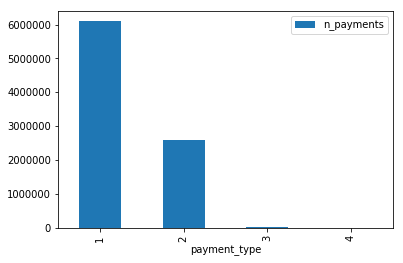

In [50]:
payment_ny.plot.bar()

In [12]:
payment_borough = df_payment.groupby(['payment_type','Borough']).payment_type.count()

In [13]:
payment_borough = pd.DataFrame(payment_borough)
payment_borough.columns = ['n_payments']
payment_borough

n_payments
payment_type Borough                  
1            Bronx                2939
             Brooklyn            63278
             EWR                   439
             Manhattan         5564623
             Queens             365196
             Staten Island          69
             Unknown            109131
2            Bronx                4114
             Brooklyn            35331
             EWR                    88
             Manhattan         2356770
             Queens             154697
             Staten Island          65
             Unknown             47735
3            Bronx                 271
             Brooklyn             1320
             EWR                    33
             Manhattan           34240
             Queens               5697
             Staten Island           9
             Unknown              1634
4            Bronx                  65
             Brooklyn              311
             EWR                    11
             Manhattan            9762
             Queens               1298
             Staten Island           1
             Unknown               404

Eseguiamo il test Chi-quadro. In questo test vogliamo studiare se sussiste una relazione tra le seguenti variabili: 

X : metodo di pagamento 

Y: distretto

Le ipotesi che abbiamo per il nostro test sono le seguenti: 

H0 : { il metodo di pagamento NON è associato al distretto}

H1 : { il metodo di pagamento è associato al distretto }



In [14]:
borough = list(payment_borough.index.levels[1])
borough

['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island', 'Unknown']

In [15]:
payment = list(payment_borough.index.levels[0])
payment

[1, 2, 3, 4]

In [16]:
t = payment_borough.get_values()
borough_values = []
l=[t[0][0]]
for i in range(1, len(t)):
    #print(t[i][0])
    l.append(t[i][0])
    #print(l)
    if(len(l)==7):
        borough_values.append(l)
        l=[]


In [17]:
borough_values

[[2939, 63278, 439, 5564623, 365196, 69, 109131],
 [4114, 35331, 88, 2356770, 154697, 65, 47735],
 [271, 1320, 33, 34240, 5697, 9, 1634],
 [65, 311, 11, 9762, 1298, 1, 404]]

In [18]:
frame = pd.DataFrame(borough_values, columns=borough)

In [19]:
frame['payment_type'] = payment

In [20]:
frame = frame.set_index('payment_type')

In [21]:
total_cols = []
for i in frame:
    total_cols.append(frame[i].sum())

In [22]:
frame['Bronx'].sum()

7389

In [23]:
total_cols

[7389, 100240, 571, 7965395, 526888, 144, 158904]

In [24]:
d = frame.to_dict()
d

{'Bronx': {1: 2939, 2: 4114, 3: 271, 4: 65},
 'Brooklyn': {1: 63278, 2: 35331, 3: 1320, 4: 311},
 'EWR': {1: 439, 2: 88, 3: 33, 4: 11},
 'Manhattan': {1: 5564623, 2: 2356770, 3: 34240, 4: 9762},
 'Queens': {1: 365196, 2: 154697, 3: 5697, 4: 1298},
 'Staten Island': {1: 69, 2: 65, 3: 9, 4: 1},
 'Unknown': {1: 109131, 2: 47735, 3: 1634, 4: 404}}

In [25]:
total_rows = []
count = 1
for i in d:
    for j in d[i]:
        if(count==1):
            total_rows.append(d[i][j])
        else:
            total_rows[j-1]+=d[i][j]
    count+=1
    #print(total_rows)


In [26]:
total_rows

[6105675, 2598800, 43204, 11852]

In [27]:
frame

,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island,Unknown
payment_type,,,,,,,
1,2939,63278,439,5564623,365196,69,109131
2,4114,35331,88,2356770,154697,65,47735
3,271,1320,33,34240,5697,9,1634
4,65,311,11,9762,1298,1,404


In [30]:
chi2, p, dof, expected = chi2_contingency(frame)

In [31]:
chi2

14460.901173348751

In [32]:
p

0.0

In [33]:
dof

18

In [34]:
expected

array([[5.15037079e+03, 6.98705059e+04, 3.98005376e+02, 5.55213665e+06,
        3.67257892e+05, 1.00372634e+02, 1.10761202e+05],
       [2.19218737e+03, 2.97394589e+04, 1.69405736e+02, 2.36319371e+06,
        1.56318476e+05, 4.27222873e+01, 4.71440440e+04],
       [3.64442293e+01, 4.94406488e+02, 2.81630192e+00, 3.92871406e+04,
        2.59873150e+03, 7.10240765e-01, 7.83750684e+02],
       [9.99761608e+00, 1.35628777e+02, 7.72586112e-01, 1.07775018e+04,
        7.12900791e+02, 1.94837829e-01, 2.15003544e+02]])